<a href="https://colab.research.google.com/github/Arturro-98/LLM/blob/main/RAG/Gemma_7b_LlamaIndex_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LlamaIndex Google Gemma 7B**

Gemma is a family of lightweight, state-of-the-art open models from Google, built from the same research and technology used to create the Gemini models. They are text-to-text, decoder-only large language models, available in English, with open weights, pre-trained variants, and instruction-tuned variants.

About Gemma:
https://blog.google/technology/developers/gemma-open-models/

Huggingface:
https://huggingface.co/google/gemma-7b-it

In [ ]:
!pip install transformers -U # Required for Gemma model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.0
    Uninstalling transformers-4.41.0:
      Successfully uninstalled transformers-4.41.0


In [ ]:
# Import necessary modules

!pip install -q pypdf
!pip install -q python-dotenv
!pip install  llama-index==0.10.12
!pip install -q gradio
!pip install einops
!pip install accelerate

!pip install llama-index-llms-huggingface # To use LLMs from HuggingFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.

In [ ]:
!pip install transformers==4.41.1 huggingface-hub==0.23.0 tokenizers==0.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.1
    Uninstalling huggingface-hub-0.23.1:
      Successfully uninstalled huggingface-hub-0.23.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1


In [ ]:
# Install llama-index and related packages
!pip install llama-index==0.10.12
!pip install llama-index-llms-huggingface
!pip install llama-index-embeddings-fastembed # Using FastEmbed as embeddings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.0
    Uninstalling huggingface-hub-0.23.0:
      Successfully uninstalled huggingface-hub-0.23.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.0
    Uninstalling tokenizers-0.19.0:
      Successfully uninstalled tokenizers-0.19.0
ERROR: pip's dependency resolver does not currently take into account all t

In [ ]:
# Install fastembed last as it requires lower versions of huggingface-hub and tokenizers
!pip install fastembed==0.2.7

In [ ]:
!pip install llama-index-llms-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.3/401.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastembed 0.2.7 requires huggingface-hub<0.21,>=0.20, but you have huggingface-hub 0.23.1 which is incompatible.
fastembed 0.2.7 requires tokenizers<0.16,>=0.15, but you have tokenizers 0.19.1 which is incompatible.


In [ ]:
!pip install llama-index-embeddings-fastembed

  Using cached huggingface_hub-0.20.3-py3-none-any.whl (330 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.1
    Uninstalling huggingface-hub-0.23.1:
      Successfully uninstalled huggingface-hub-0.23.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-llms-huggingface 0.2.0 requires huggingface-hub<0.24.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.
transformers 4.41.1 requires huggingface-hub<1.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.
transformers 4.41.1 requires tokenizers<0.20

In [ ]:
!pip install fastembed -U

In [ ]:
!pip uninstall huggingface-hub tokenizers

Found existing installation: huggingface-hub 0.20.3
Uninstalling huggingface-hub-0.20.3:
  Would remove:
    /usr/local/bin/huggingface-cli
    /usr/local/lib/python3.10/dist-packages/huggingface_hub-0.20.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/huggingface_hub/*
Proceed (Y/n)? y
  Successfully uninstalled huggingface-hub-0.20.3
Found existing installation: tokenizers 0.15.2
Uninstalling tokenizers-0.15.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tokenizers-0.15.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tokenizers/*
Proceed (Y/n)? y
  Successfully uninstalled tokenizers-0.15.2


In [ ]:
!pip install "huggingface-hub>=0.23.0,<1.0"
!pip install "tokenizers>=0.19,<0.20"

  Using cached huggingface_hub-0.23.1-py3-none-any.whl (401 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastembed 0.2.7 requires tokenizers<0.16,>=0.15, which is not installed.
transformers 4.41.1 requires tokenizers<0.20,>=0.19, which is not installed.
fastembed 0.2.7 requires huggingface-hub<0.21,>=0.20, but you have huggingface-hub 0.23.1 which is incompatible.
  Using cached tokenizers-0.19.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastembed 0.2.7 requires huggingface-hub<0.21,>=0.20, but you have huggingface-hub 0.23.1 which is incompatible.
fastembed 0.2.7 requires tokenizers<0.16,>=0.15, but you have tokenizers 0.19.1 which is incompatible.


In [ ]:
!pip install --upgrade typing_extensions

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.


In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
import os
pdf_folder_path = f'{root_dir}Colab_Notebooks/LLM-RAG//Data/' # PDF files on gdrive
os.listdir(pdf_folder_path)

['Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf',
 'Psychology-of-Human-Relations-1695056929._print.pdf',
 'Fundamentals-of-Psychological-Disorders.pdf']

In [ ]:
os.makedirs('/content/Data') # Making 'Data' folder in Colab workspace to copy all documents

In [ ]:
''' Copy all data from Gdrive into created Data folder in Colab'''

import shutil

data_dir = '/content/Data/'

files = os.listdir(pdf_folder_path)
for file in files:
    shutil.copy(os.path.join(pdf_folder_path, file), data_dir) # Copying all files into Colab workspace to speed up fetching data process

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab_Notebooks/LLM-RAG/')
from get_access import get_func
key_and_token = get_func() # Function returns the list with OpenAI key[0] & HuggingFace token[1]

In [ ]:
# Set up logging to print out informational messages to the standard output

import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

# Import necessary classes from llama_index
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core import Settings

# Load documents from a directory
documents = SimpleDirectoryReader(data_dir).load_data()

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [ ]:
# Using FastEmbed as embedding model "BAAI/bge-small-en-v1.5"

from llama_index.embeddings.fastembed import FastEmbedEmbedding

embed_model = FastEmbedEmbedding(model_name="BAAI/bge-small-en-v1.5")
Settings.embed_model = embed_model
Settings.chunk_size = 512

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

In [ ]:
# Define a system prompt and a query wrapper prompt

from llama_index.core import PromptTemplate


system_prompt = "You are a Q&A assistant. Your goal is to answer questions as accurately as possible based on the instructions and context provided."


# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

In [ ]:
# Log in to HuggingFace

#print(key_and_token[1]) # Stored HuggingFace token

# Now, use notebook_login which should pick up the token from the environment variable
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch

# Set up a large language model (LLM) using HuggingFaceLLM with the model name "google/gemma-7b-it"
llm = HuggingFaceLLM(
    context_window=8192,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.6, "do_sample": True}, # OR "do_sample": False, "temperature": None
                                                              # Temperature is a parameter that controls the randomness of predictions by scaling the logits before applying softmax
                                                              # do_sample is a boolean parameter that determines whether the model should use sampling (introduces randomness and diversity) to generate text
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="google/gemma-7b-it",
    model_name="google/gemma-7b-it",
    device_map="auto",
    #stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.float16}
)

Settings.llm = llm
Settings.chunk_size = 512

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some parameters are on the meta device device because they were offloaded to the disk and cpu.


<br>
<br>

**If want to use gradio as an output, execute 'index' and def predict()**

<br>
<br>

In [ ]:
# Create an index from the loaded documents and use it to create a query engine

index = VectorStoreIndex.from_documents(documents)

In [ ]:
# Define a function named `predict` that takes an input and a history, queries the engine with the input, and returns the response as a string
query_engine = index.as_query_engine()

def predict(input, history):
  response = query_engine.query(input)
  return str(response)

In [ ]:
def man_predict(input_text):
    response = query_engine.query(input_text)
    return str(response)

In [ ]:
query = "What are conflicts in emotions and how to overcome them?"

In [ ]:
response = man_predict(query)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print(f"Bot: {response}")

Bot: Sure, here is the answer to your query:

**Conflicts in Emotions:**

According to the text, conflicts in emotions are closely linked to conflict itself. Emotions can cause conflict and conflict can cause emotions. This relationship has been shown in empirical research. The text also mentions that emotions can make conflict worse or better.

**Overcoming Conflicts in Emotions:**

The text suggests that emotions are usually better managed when expressed constructively and conflict is usually managed better when expressed constructively. Additionally, it states that emotions can be contagious, affecting those around us. Therefore, to overcome conflicts in emotions, it is important to express emotions constructively and manage conflict constructively.

**Please note:** This answer is based on the text provided and does not include any prior knowledge or assumptions.


In [ ]:
import textwrap
import re

def wrap_text_with_formatting(text, width=80):
    # Split the text by newlines to handle each paragraph separately
    paragraphs = text.split('\n')
    wrapped_paragraphs = []

    for paragraph in paragraphs:
        # Find all occurrences of **bold text**
        bold_parts = re.findall(r'\*\*(.*?)\*\*', paragraph)

        # Replace **bold text** with placeholders
        temp_paragraph = re.sub(r'\*\*(.*?)\*\*', r'##BOLD##', paragraph)

        # Wrap the paragraph
        wrapped = textwrap.wrap(temp_paragraph, width=width)

        # Reinsert the bold text in the wrapped lines
        for i in range(len(wrapped)):
            for bold_text in bold_parts:
                wrapped[i] = wrapped[i].replace('##BOLD##', f'**{bold_text}**', 1)

        wrapped_paragraphs.extend(wrapped)
        wrapped_paragraphs.append('')  # Add a newline between paragraphs

    return "\n".join(wrapped_paragraphs).strip()

In [ ]:
wrapped_response = wrap_text_with_formatting(response, width=80)
print(f"Bot: {wrapped_response}")

Bot: Sure, here is the answer to your query:


**Conflicts in Emotions:**


According to the text, conflicts in emotions are closely linked to conflict
itself. Emotions can cause conflict and conflict can cause emotions. This
relationship has been shown in empirical research. The text also mentions that
emotions can make conflict worse or better.


**Overcoming Conflicts in Emotions:**


The text suggests that emotions are usually better managed when expressed
constructively and conflict is usually managed better when expressed
constructively. Additionally, it states that emotions can be contagious,
affecting those around us. Therefore, to overcome conflicts in emotions, it is
important to express emotions constructively and manage conflict constructively.


**Please note:** This answer is based on the text provided and does not include any
prior knowledge or assumptions.


In [ ]:
query_pl = "Co oznaczaja konflikty w emocjach i jak im zapobiec? Podaj mi rowniez zrodlo"
response = man_predict(query_pl)
wrapped_response = wrap_text_with_formatting(response, width=80)
print(f"Bot: {wrapped_response}")

Bot: O podanej treści nie ma informacji o sposób zapobiegania konfliktom w emocjach,
więc ja nie jestem w stanie odpowiedzieć na ten query.


**Note:**

- The text does not provide information about the methods of conflict
resolution, therefore I cannot answer this query.

- The text primarily focuses on the application of neuroscience to conflict
management and the potential impact of oxytocin and empathy on conflict
resolution.


In [ ]:
# Set up a chat interface using gradio and launch it

import gradio as gr

gr.ChatInterface(predict).launch(share=True)

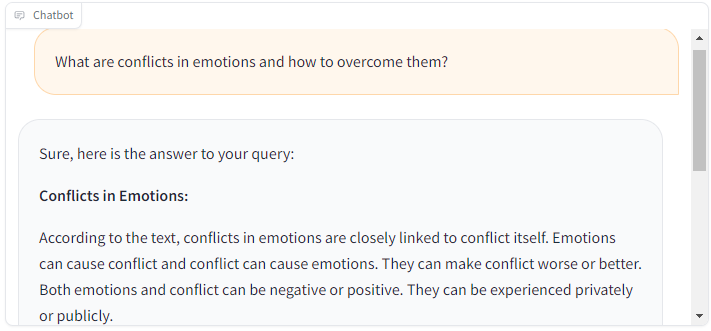

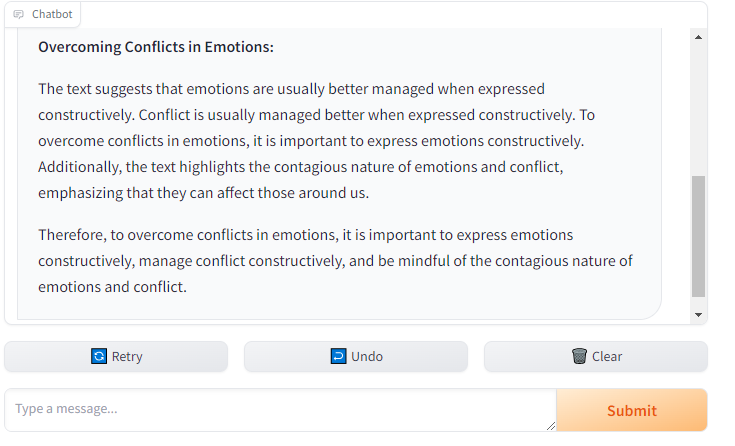

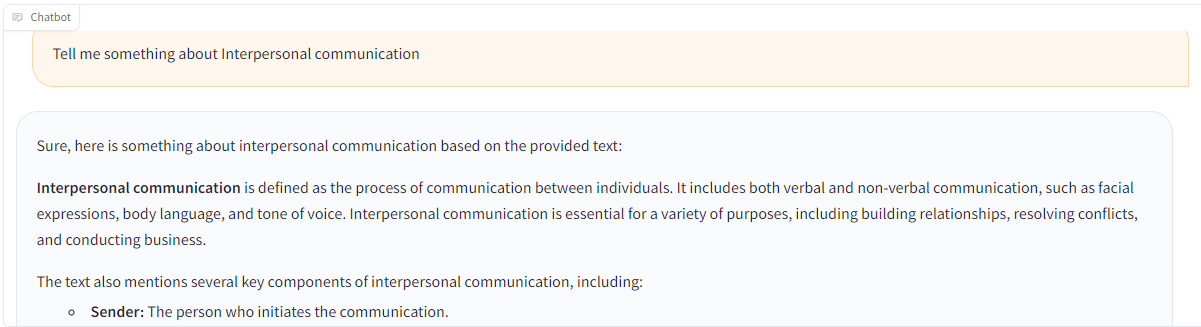

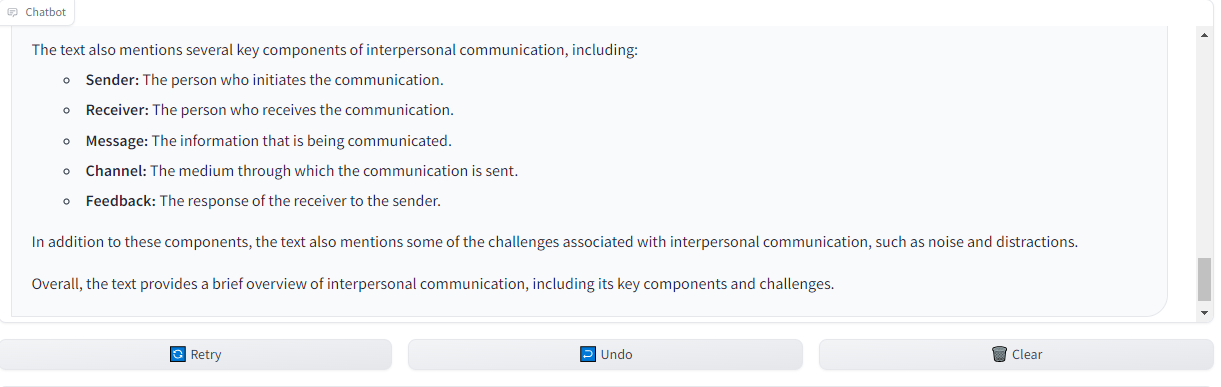

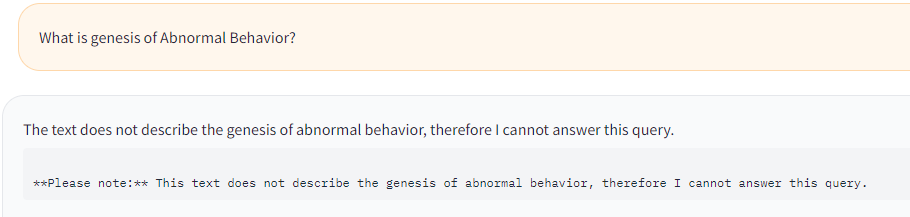

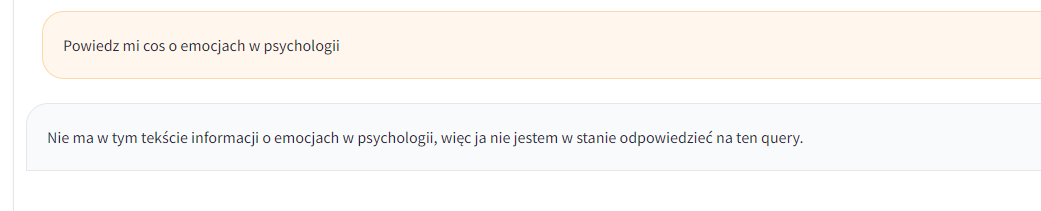